# External Data

In [1]:
import lxml
import os
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import datetime as dt
import random as random
import pandas as pd
import seaborn as sns
# get current working directory to load and save files
thedir = os.getcwd()
# use cwd to to get folders containing figures and data
datadir = os.path.abspath(os.path.join(os.path.dirname(thedir), '..', 'acrop/data'))
figdir = os.path.abspath(os.path.join(os.path.dirname(thedir), '..', 'acrop/figures'))

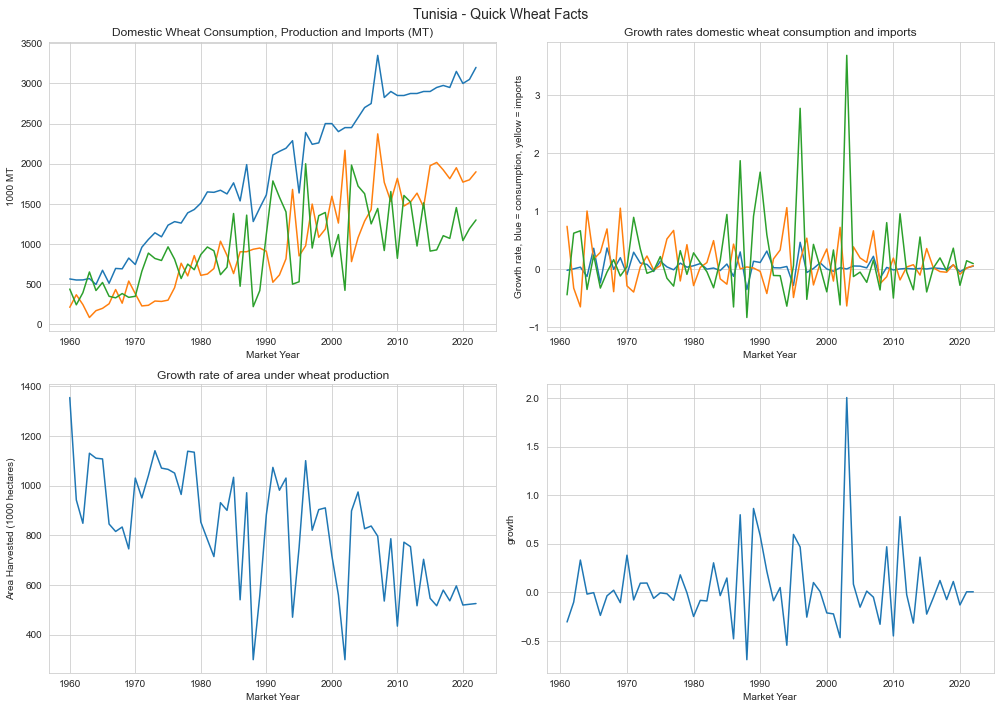

In [4]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(2,2,figsize=(14,10))
# import data
consumption=pd.read_html('https://www.indexmundi.com/agriculture/?country=tn&commodity=wheat&graph=domestic-consumption')
production=pd.read_html('https://www.indexmundi.com/agriculture/?country=tn&commodity=wheat&graph=production')
area=pd.read_html('https://www.indexmundi.com/agriculture/?country=tn&commodity=wheat&graph=area-harvested')
imports=pd.read_html('https://www.indexmundi.com/agriculture/?country=tn&commodity=wheat&graph=imports')

def p2f(x):
    try:
        return float(x.strip('%'))/100
    except:
        return x

# consumption, production and import totals per year
data_ = consumption[4]
data = data_[["Domestic Consumption","Market Year"]]
sns.lineplot(data= data, y = "Domestic Consumption",x = "Market Year",ax = axs[0,0])
data__ = imports[4]
data = data__[["Imports","Market Year"]]
sns.lineplot(data= data, y = "Imports",x = "Market Year",ax = axs[0,0])
data___ = production[4]
data = data___[["Production","Market Year"]]
sns.lineplot(data= data, y = "Production",x = "Market Year",ax = axs[0,0])
axs[0,0].set_ylabel("1000 MT")
axs[0,0].set_title('Domestic Wheat Consumption, Production and Imports (MT)')

# growth rates consumption production and imports
data_ = consumption[4]
data = data_[["Growth Rate","Market Year"]]
data_['growth']=data_['Growth Rate'].apply(lambda x: p2f(x))
sns.lineplot(data= data_, y = "growth",x = "Market Year",ax = axs[0,1])
data__ = imports[4]
data__.dropna(axis = 0,how = 'any',inplace=True)
data__['growth']=data__['Growth Rate'].apply(lambda x: p2f(x))
sns.lineplot(data=data__, y = "growth",x = "Market Year",ax = axs[0,1])
data___.dropna(axis = 0,how = 'any',inplace=True)
data_['growth']=data___['Growth Rate'].apply(lambda x: p2f(x))
sns.lineplot(data= data_, y = "growth",x = "Market Year",ax = axs[0,1])
axs[0,1].set_ylabel("Growth rate, blue = consumption, yellow = imports")
axs[0,1].set_title('Growth rates domestic wheat consumption and imports')

# hectares total
data__ = area[4]
data = data__[["Area Harvested","Market Year"]]
sns.lineplot(data= data, y = "Area Harvested",x = "Market Year",ax = axs[1,0])
axs[1,0].set_ylabel("Area Harvested (1000 hectares)")
axs[1,0].set_title('Area under wheat production')

# growth rate hectares
data__.dropna(axis = 0,how = 'any',inplace=True)
data_['growth']=data__['Growth Rate'].apply(lambda x: p2f(x))
sns.lineplot(data= data_, y = "growth",x = "Market Year",ax = axs[1,1])
axs[1,0].set_title('Growth rate of area under wheat production')

fig = plt.gcf()
fig.suptitle("Tunisia - Quick Wheat Facts", fontsize=14)
plt.tight_layout()
plt.savefig(F'{figdir}/summary_wheat')
plt.show()

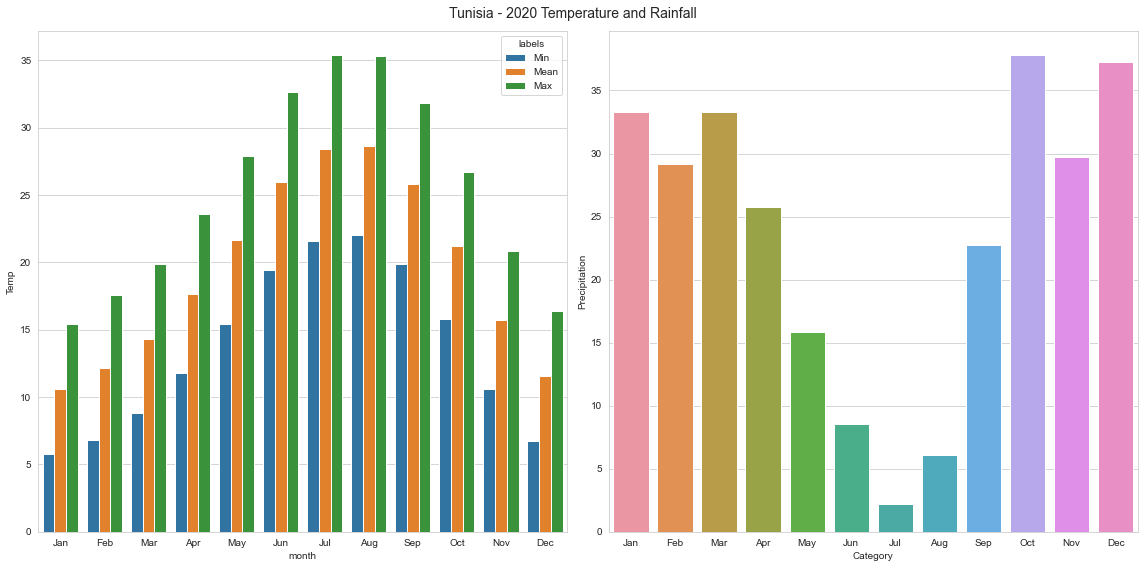

In [8]:
fig, axs = plt.subplots(1,2,figsize=(16,8))
monthly = pd.read_csv(F'{datadir}/monthly-climatology-of-min-temperature,-mean-temperature,-max-temperature-&-precipitation-1961-1990 br_ tunisia.csv')
mylist = []
for i in monthly.columns:
    if (i != "Category") & (i != "Precipitation"):
        label = i[:-12]
        monthly["labels"] = label
        monthly["Temp"] = monthly[i]
        monthly["month"] = monthly.Category
        mylist.append(monthly.iloc[:,5:])
    if i == "Precipitation":
        name = i[-13:]
merged = pd.concat([mylist[0],mylist[1],mylist[2]])
sns.barplot(x="month", y="Temp", hue='labels', data=merged,ax = axs[0])
data = monthly[["Category","Precipitation"]]
sns.barplot(data=data,x="Category",y="Precipitation",ax=axs[1])
fig = plt.gcf()
fig.suptitle("Tunisia - 2020 Temperature and Rainfall", fontsize=14)
plt.tight_layout()
plt.savefig(F"{figdir}/summary_temp_rain")
plt.show()

In [9]:
monthly = pd.read_csv('monthly-climatology-of-min-temperature,-mean-temperature,-max-temperature-&-precipitation-1961-1990 br_ tunisia.csv')
mylist = []
for i in monthly.columns:
    if (i != "Category") & (i != "Precipitation"):
        label = i[:-12]
        monthly["labels"] = label
        monthly["Temp"] = monthly[i]
        monthly["month"] = monthly.Category
        mylist.append(monthly.iloc[:,5:])
    if i == "Precipitation":
        name = i[-13:]
merged = pd.concat([mylist[0],mylist[1],mylist[2]])

FileNotFoundError: [Errno 2] No such file or directory: 'monthly-climatology-of-min-temperature,-mean-temperature,-max-temperature-&-precipitation-1961-1990 br_ tunisia.csv'